# Homework Week 8: High Frequency Words

## Data 620 Web Analytics

### Kyle Gilde

### 10/17/18

#### Instructions

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.

For this exercise, let's use the Wall Street Journal corpus.

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#nltk.download() # C:\Users\kyleg\AppData\Roaming\nltk_data
from nltk.book import text7
text7

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<Text: Wall Street Journal>

In [3]:
[token for token in text7[:10]]

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the']

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

First, let's normalize the corpus by doing the following:

- stemming using the Porter stemmer

- changing the letters to lowercase

- only selecting tokens with alphabetical characters

This normalization nearly cuts the number of unique tokens in half.

In [4]:
print(len(set(text7)))
stemmer = nltk.PorterStemmer()
wsj_stemmed = [stemmer.stem(t).lower() for t in text7 if t.isalpha()]
print(len(set(wsj_stemmed)))
wsj_stemmed[:10]

12408
6300


['pierr', 'vinken', 'year', 'old', 'will', 'join', 'the', 'board', 'as', 'a']

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

The 123 most common words account for 50% of all words in the corpus.

In [7]:
fdist = nltk.FreqDist(wsj_stemmed)
fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['word', 'n'])
fdist_df['proportion'] = fdist_df.n / fdist_df.n.sum()

fdist_df = fdist_df.sort_values('n', ascending=False).reset_index().drop('index', axis=1)
fdist_df['cumulative'] = fdist_df.proportion.cumsum()
fdist_df[fdist_df.cumulative <= .5].shape[0]

123

4. Identify the 200 highest frequency words in this corpus.

Here they are by descending frequency.

In [13]:
top200 = fdist_df[:200]
print([word for word in top200.word])

['the', 'of', 'to', 'a', 'in', 'and', 'it', 'for', 'that', 'is', 'said', 'on', 'by', 'at', 'as', 'with', 'from', 'be', 'million', 'wa', 'are', 'ha', 'have', 'an', 'new', 'year', 'compani', 'say', 'but', 'he', 'or', 'will', 'trade', 'market', 'they', 'stock', 'share', 'which', 'thi', 'about', 'would', 'more', 'were', 'price', 'their', 'than', 'program', 'presid', 'who', 'had', 'also', 'one', 'billion', 'other', 'up', 'been', 'some', 'bank', 'not', 'hi', 'rate', 'becaus', 'if', 'could', 'fund', 'all', 'manag', 'i', 'first', 'issu', 'report', 'investor', 'two', 'offer', 'ani', 'york', 'sale', 'last', 'make', 'month', 'execut', 'plan', 'mani', 'there', 'she', 'when', 'recent', 'use', 'such', 'do', 'no', 'futur', 'busi', 'invest', 'we', 'can', 'industri', 'you', 'time', 'so', 'profit', 'japanes', 'bond', 'after', 'expect', 'increas', 'into', 'govern', 'over', 'oper', 'like', 'close', 'most', 'onli', 'includ', 'may', 'even', 'ad', 'group', 'product', 'feder', 'firm', 'out', 'week', 'take', '

5. Create a graph that shows the relative frequency of these 200 words.


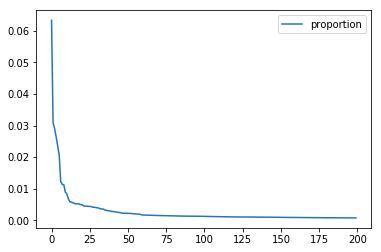

In [109]:
top200[['word', 'proportion']].plot.line()

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Yes, as the probability mass function shows above, a word's frequency is inversely proportional to its rank. As the rank increase, its frequency decrease.

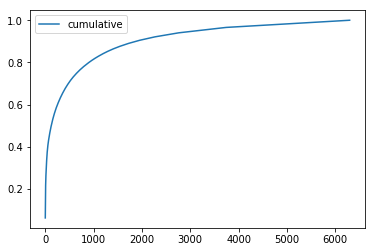

In [14]:
fdist_df[['word', 'cumulative']].plot.line()

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Let's not hypothesize. Let's remove all of the words from the top 200 Wall Street Journal words that are also in the classic American novel Moby Dick. 8 of the top 200 remain, and they are exactly the words one would expect to be unique to the business 

In [22]:
from nltk.book import text1
stemmed_moby_dick = set(stemmer.stem(word).lower() for word in text1)

wsj_less_moby_dick_words = [word for word in top200.word if word not in stemmed_moby_dick]
print([word for word in wsj_less_moby_dick_words])

['program', 'fund', 'investor', 'sale', 'analyst', 'financi', 'chairman', 'yen', 'trader']
